Binomial  Distribution: Mode and Smallest Interval
------

# Import Libraries

In [1]:
from scipy.stats import binom 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

# Create Table

In [3]:
E = np.arange(0.5,4.5,0.5)
Trials = np.array([100.0,100.0,100.0,100.0,100.0,1000.0,1000.0,1000.0], dtype = int)
Succ = np.array([0.0,4.0,20.0,58.0,92.0,987.0,995.0,998.0], dtype = int)

In [4]:
table = pd.DataFrame({'Trials': Trials, 'Succ': Succ}, index=E)

In [5]:
table['mode'] = table['Succ']/table['Trials']

# Binomial Posterior

## Functions

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [17]:
def intervals(ydata, alpha, cdf):
    interval = []
    indexes = []
    for e in np.arange(ydata.argmax()):
        idx = find_nearest(ydata[e+1:],ydata[e])
        interval.append(cdf[idx+e] - cdf[e])
        indexes.append((e,idx+e))
    interval = np.array(interval)
    if interval != np.array([]): #two-sidded
        i_min = find_nearest(interval, 0.68)
    else: #one-sided
        indexes.append((0,find_nearest(cdf, 0.32)))
        i_min = 0
    
    return indexes[i_min]                                                      

In [18]:
def plot(index):
    plt.vlines(xdata[index[0]], 0, ydata[index[0]])
    plt.vlines(xdata[index[1]], 0, ydata[index[1]])
    plt.plot(xdata, ydata)
    plt.fill_between(xdata[index[0]:index[1]], ydata[index[0]:index[1]], 
                 facecolor='blue', alpha=0.5)


## Results

/Users/jlrestrepol/opt/miniconda3/envs/cite-seq/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':
/Users/jlrestrepol/opt/miniconda3/envs/cite-seq/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


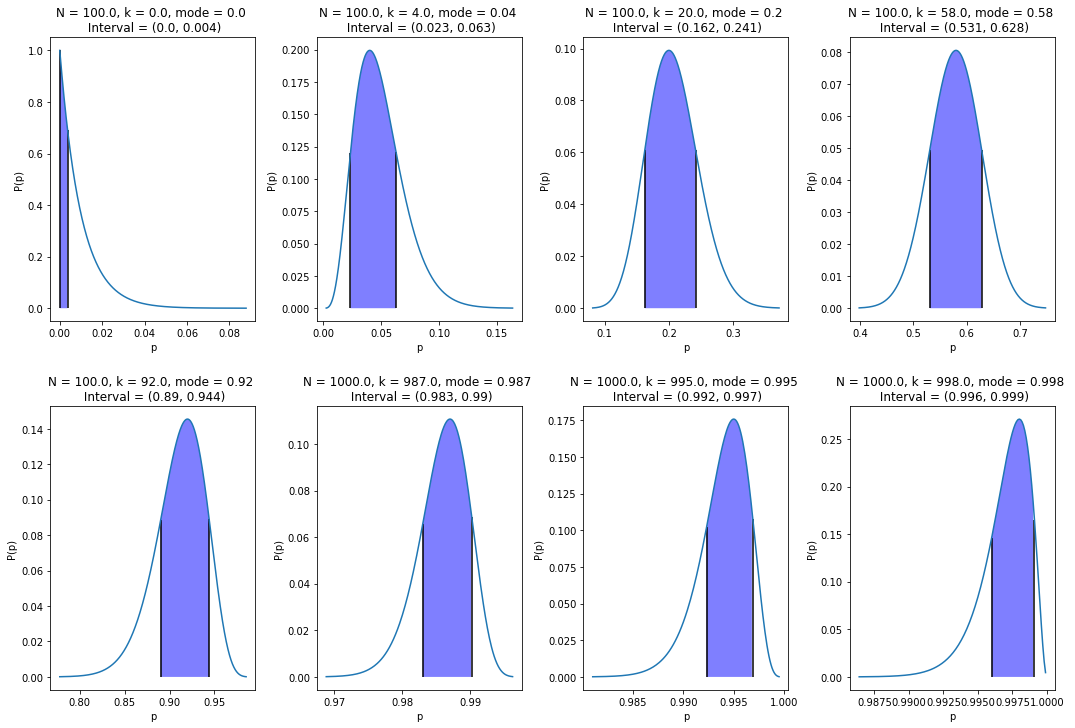

In [20]:
gs = plt.GridSpec(2, 4, figure = plt.figure(None, (18,12)), wspace = 0.3, hspace = 0.3)
i=0
interval_list = []
for index, row in table.iterrows():
    n, s, mode = row['Trials'], row['Succ'], row['mode']
    xdata = np.arange(0, 1.0, 0.0001)
    ydata = np.array([binom.pmf(s,n,p) for p in xdata])
    xdata = xdata[ydata>1e-4]
    ydata = ydata[ydata>1e-4]
    cdf = np.cumsum(ydata)/np.sum(ydata)
    int_x = intervals(ydata,0.68, cdf)
    plt.subplot(gs[i])
    plot(int_x)
    interval = (round(xdata[int_x[0]],3),round(xdata[int_x[1]],3))
    interval_list.append(interval)
    plt.title("N = {}, k = {}, mode = {} \n Interval = {}".format(n,s,mode,interval))
    plt.xlabel('p')
    plt.ylabel('P(p)')
    i += 1
plt.show()

In [21]:
table['interval'] = interval_list

In [22]:
print(table.to_latex())

\begin{tabular}{lrrrl}
\toprule
{} &  Trials &  Succ &   mode &        interval \\
\midrule
0.5 &     100 &     0 &  0.000 &    (0.0, 0.004) \\
1.0 &     100 &     4 &  0.040 &  (0.023, 0.063) \\
1.5 &     100 &    20 &  0.200 &  (0.162, 0.241) \\
2.0 &     100 &    58 &  0.580 &  (0.531, 0.628) \\
2.5 &     100 &    92 &  0.920 &   (0.89, 0.944) \\
3.0 &    1000 &   987 &  0.987 &   (0.983, 0.99) \\
3.5 &    1000 &   995 &  0.995 &  (0.992, 0.997) \\
4.0 &    1000 &   998 &  0.998 &  (0.996, 0.999) \\
\bottomrule
\end{tabular}

